In [42]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import matplotlib.pyplot as plt

#target parameters
a = 4
b = -3
c = -2
d = 3

def g(x):
    return a + b*x + c*x*x + d*x*x*x

def network_model(nr_neurons, nr_layers, choosen_optimizer, choosen_loss, choosen_activation ): 
    #lo costruisco con lo stesso nr di neuroni in ogni layer 
    model = tf.keras.Sequential()
    
    model.add(Dense(nr_neurons, input_shape=(1,),activation=choosen_activation)) #input layer
    
    for i in range(nr_layers): #hidden layers
        model.add(Dense(nr_neurons, activation=choosen_activation))
        
    model.add(Dense(1, activation=choosen_activation)) #output layer
    
    model.compile(optimizer=choosen_optimizer, loss=choosen_loss, metrics=['mse'])
    return model

def fit_model (x_train, y_train, nr_epochs, x_valid, y_valid ):
    
    return model.fit(x=x_train, y=y_train, batch_size=32, epochs=nr_epochs, 
                        shuffle=True, validation_data=(x_valid, y_valid), verbose=0,) 
            

16/16 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

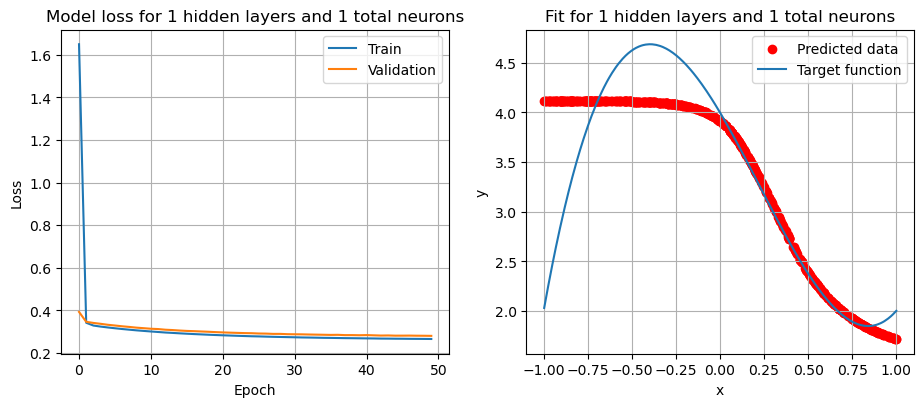

16/16 [==============================] - 0s 2ms/step


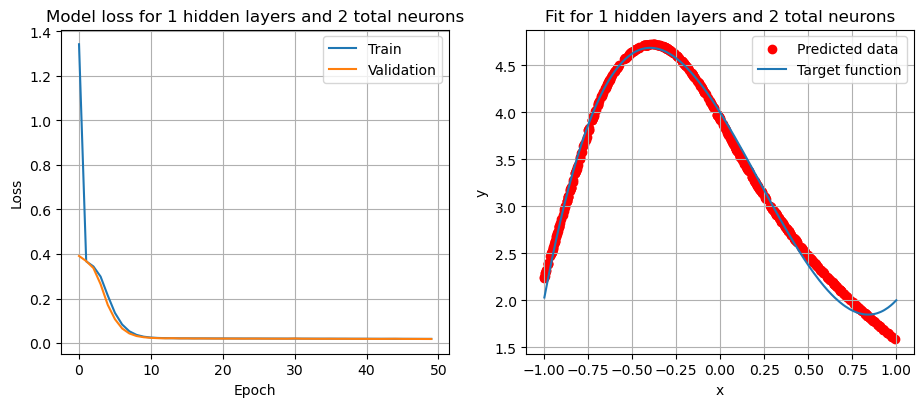

16/16 [==============================] - 0s 1ms/step


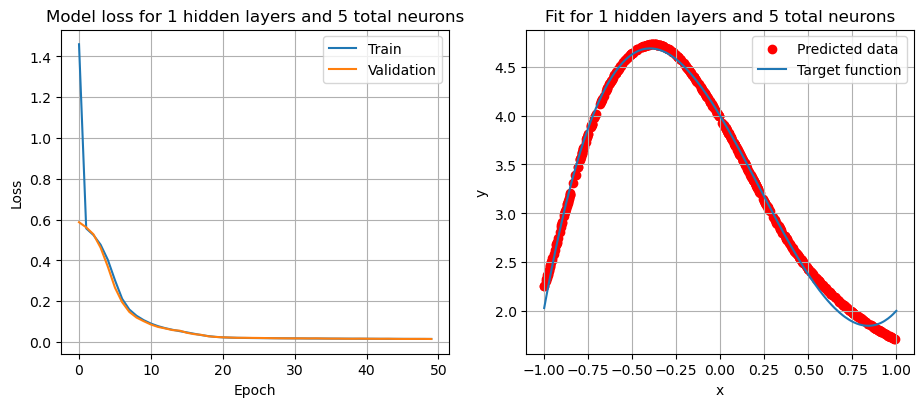

16/16 [==============================] - 0s 1ms/step


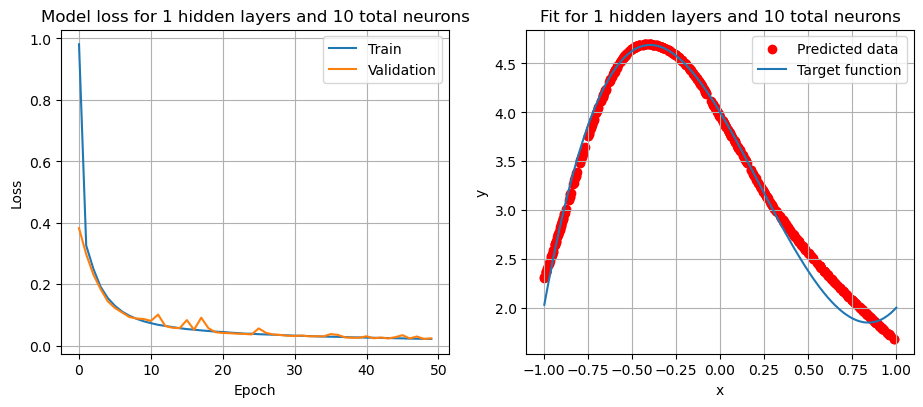

16/16 [==============================] - 0s 1ms/step


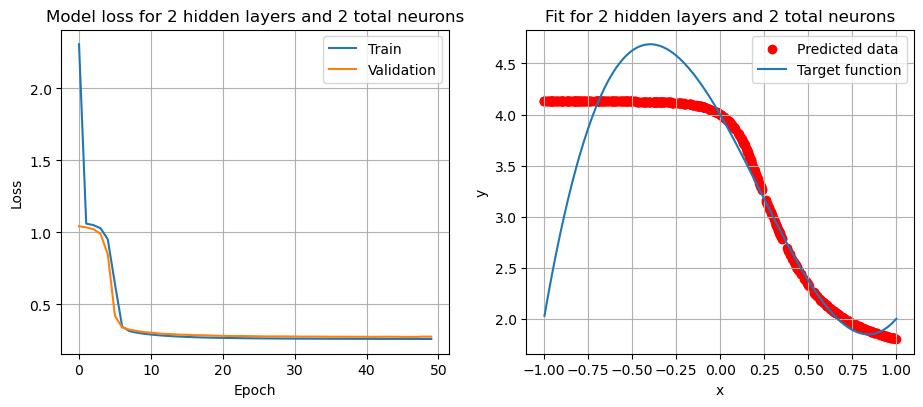

16/16 [==============================] - 0s 1ms/step


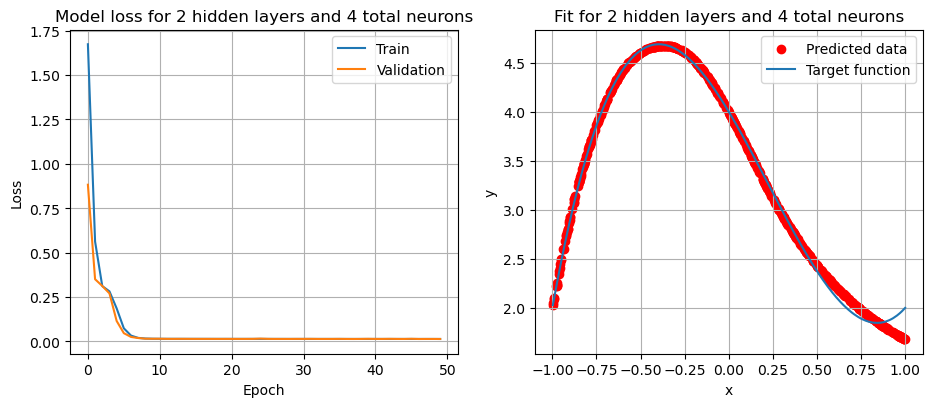

16/16 [==============================] - 0s 1ms/step


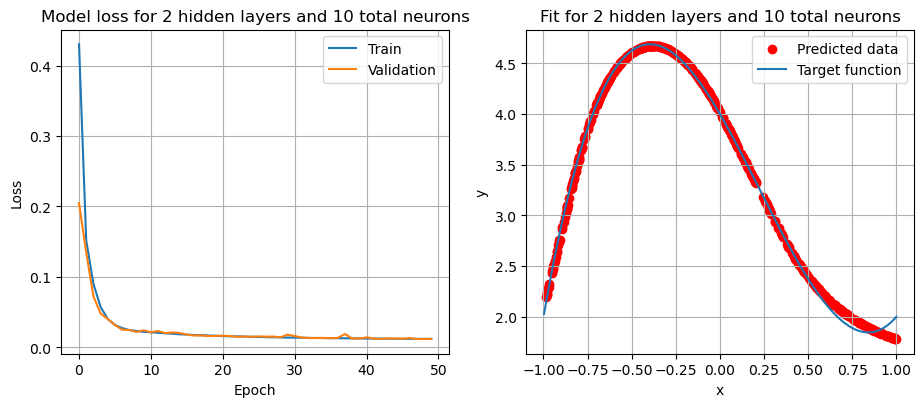

16/16 [==============================] - 0s 2ms/step


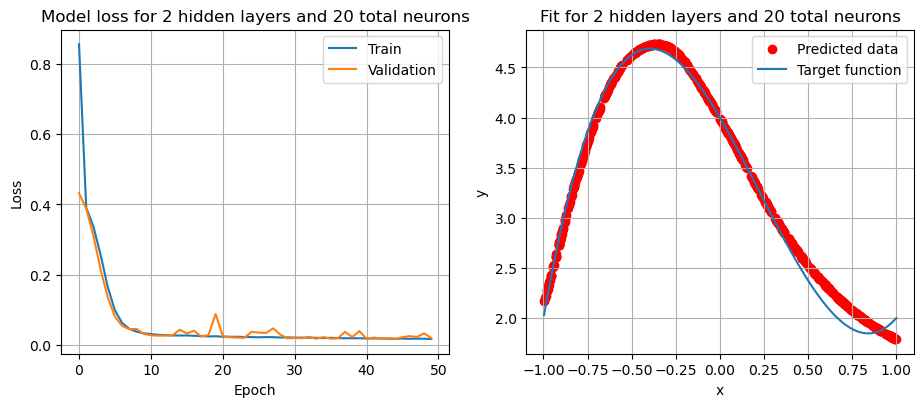

16/16 [==============================] - 0s 1ms/step


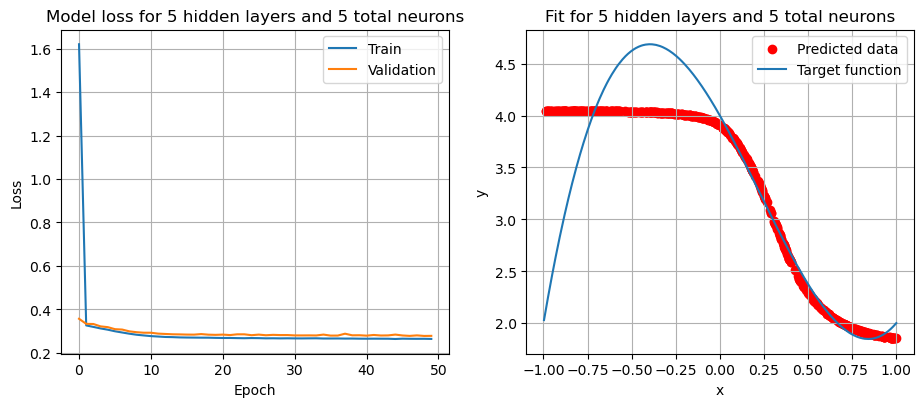

16/16 [==============================] - 0s 1ms/step


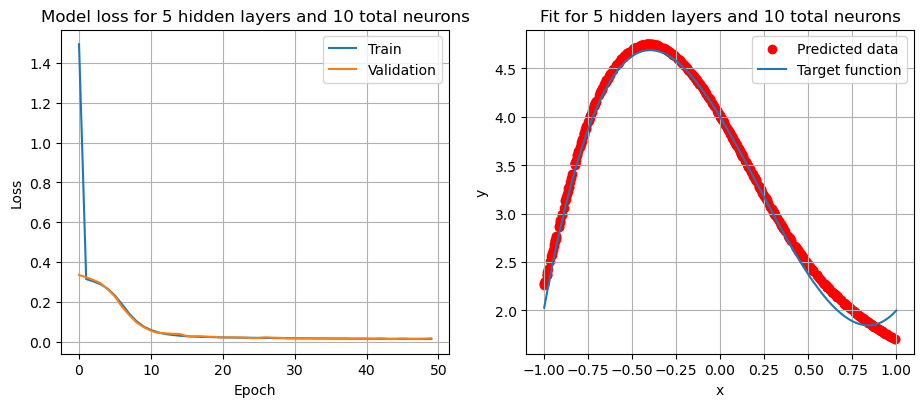

16/16 [==============================] - 0s 1ms/step


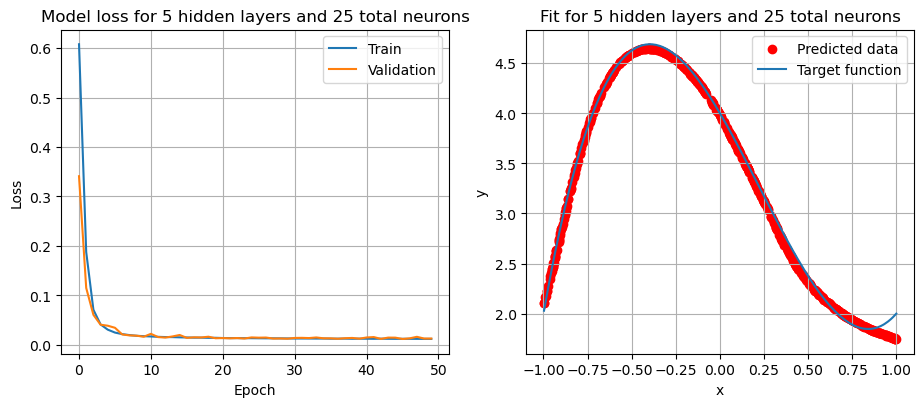

16/16 [==============================] - 0s 1ms/step


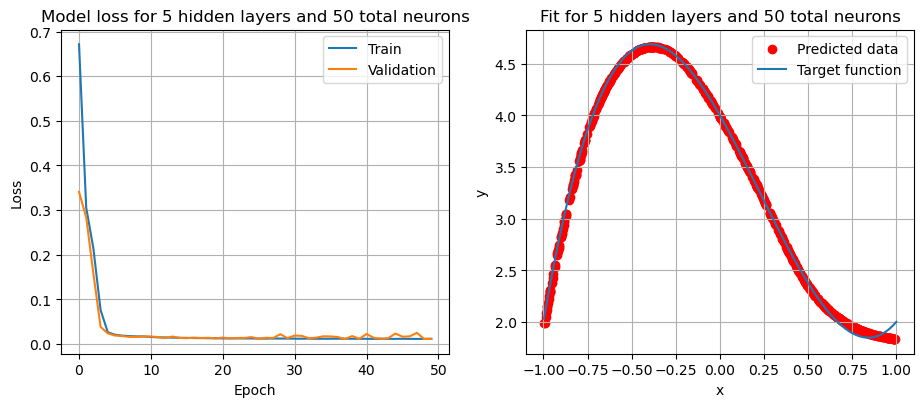

16/16 [==============================] - 0s 1ms/step


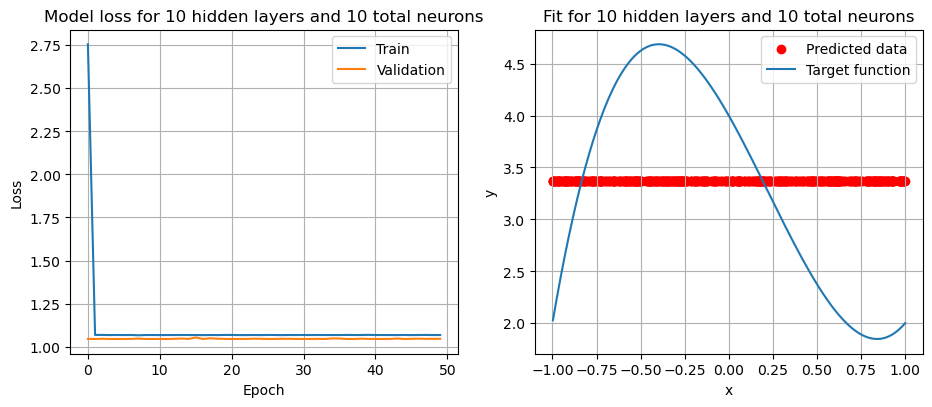

16/16 [==============================] - 0s 1ms/step


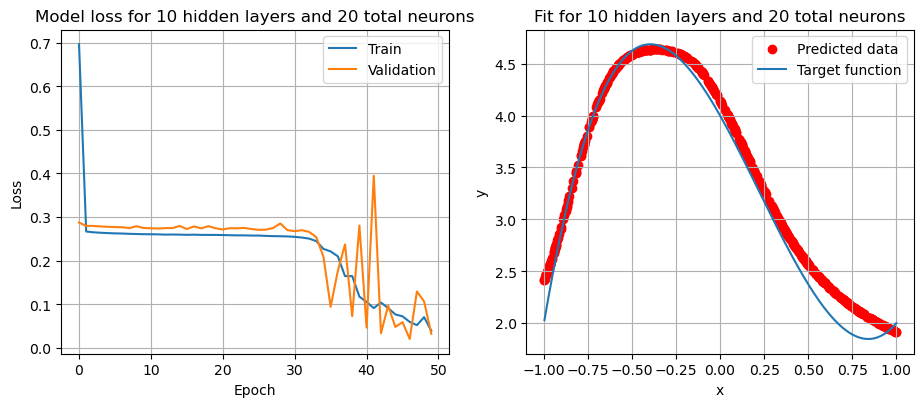

16/16 [==============================] - 0s 1ms/step


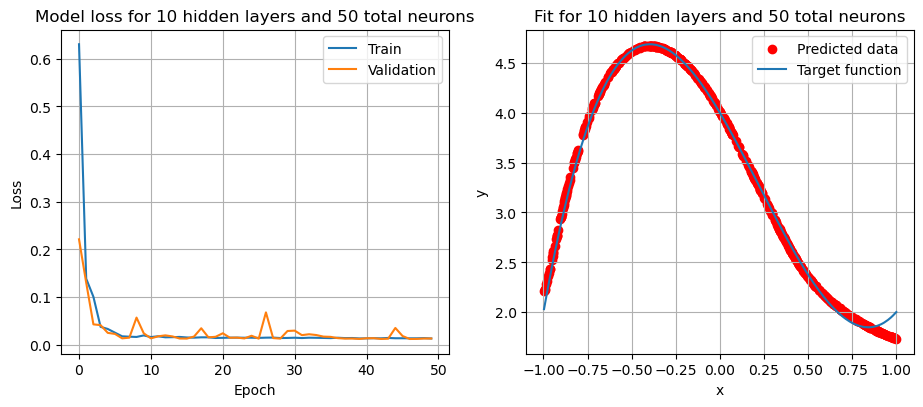

16/16 [==============================] - 0s 1ms/step


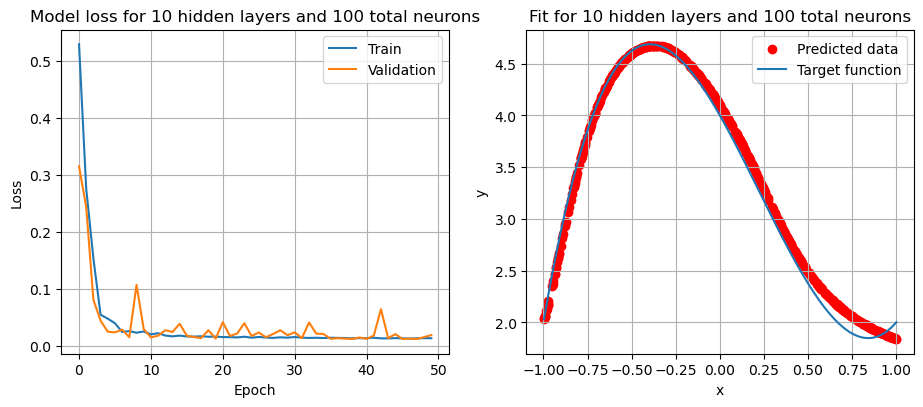

In [18]:
epochs_number = 50
sigma=0.1 #noise standard deviation

nr_neurons = [1, 2, 5, 10]
nr_layers = [1, 2, 5, 10]
rows=len(nr_neurons)*len(nr_layers)
columns=2
i=1

# generate training inputs
np.random.seed(0)
#90%train, 10%test
x_train = np.random.uniform(-1, 1, 5000) #dati di train
x_valid = np.random.uniform(-1, 1, 500) #set di valutazione
x_valid.sort()
y_target = g(x_valid)# ideal (target) linear function

#sporco i dati con un rumore gaussiano scorrelato
y_train = np.random.normal(g(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(g(x_valid), sigma)

for l in nr_layers:
    for n in nr_neurons: 

        model = network_model(n, l,'sgd', 'mse', 'elu')
        history = fit_model(x_train,y_train, epochs_number, x_valid, y_valid)
        
        plt.figure(figsize=(11,5*rows))
        plt.subplot(rows, columns, i)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss for '+str(l)+' hidden layers and '+str(n*l)+' total neurons')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.grid(True)
        plt.legend(['Train', 'Validation'], loc='best')
          
        plt.subplot(rows, columns, i+1)           
        plt.title('Fit for '+str(l)+' hidden layers and '+str(n*l)+' total neurons')
        x_predicted = np.random.uniform(-1, 1, 500) 
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r', label ='Predicted data')
        plt.plot(x_valid, y_target, label ='Target function')
        plt.legend(loc='upper right')
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)
            
        plt.show()
            
        i=i+2;

Osservando i plot prodotti, possiamo vedere come i risultati migliori si ottengano per reti neurali costruite con 5 
layer. Andiamo, percio', a investigare il caso di 5 layer per studiare se, aumentando il numero di neuroni a fronte di una spesa computazionale piu' grossa, riusciamo a fittare anche la risalita finale della funzione. \
Fissato il numero di hidden layers a 5, quindi, studiamo il nostro network nel caso in cui portiamo il numero di neuroni per layer a 30, 40 o 50.

16/16 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

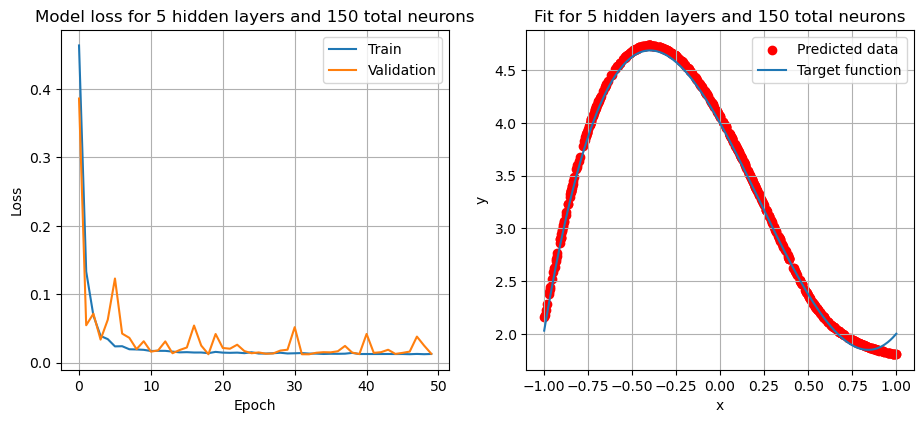

16/16 [==============================] - 0s 1ms/step


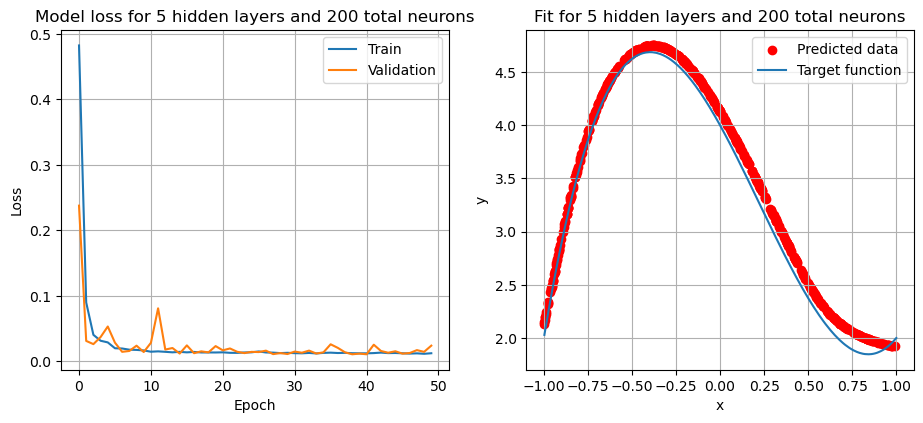

16/16 [==============================] - 0s 1ms/step


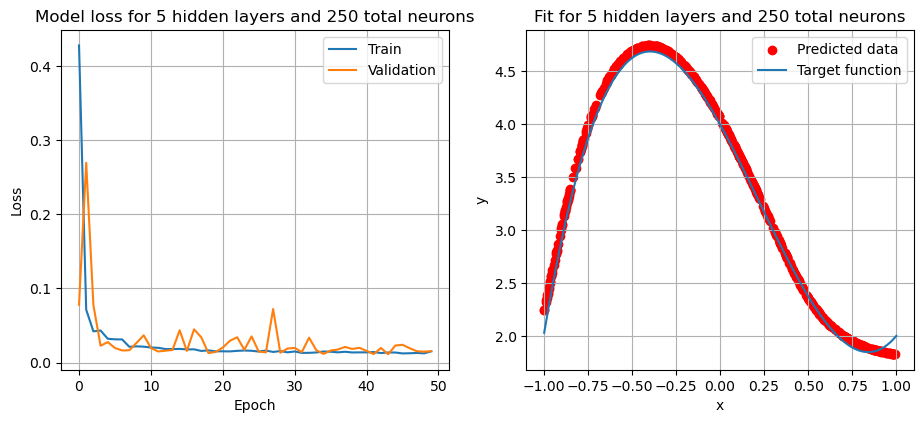

In [22]:
epochs_number = 50
sigma=0.1 #noise standard deviation

nr_neurons = [30, 40, 50]
nr_layers = 5
rows=len(nr_neurons)
columns=2
i=1

# generate training inputs
np.random.seed(0)
#90%train, 10%test
x_train = np.random.uniform(-1, 1, 5000) #dati di train
x_valid = np.random.uniform(-1, 1, 500) #set di valutazione
x_valid.sort()
y_target = g(x_valid)# ideal (target) linear function

#sporco i dati con un rumore gaussiano scorrelato
y_train = np.random.normal(g(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(g(x_valid), sigma)

for n in nr_neurons: 

    model = network_model(n, l,'sgd', 'mse', 'elu')
    history = fit_model(x_train,y_train, epochs_number, x_valid, y_valid)
        
    plt.figure(figsize=(11,5*rows))
    plt.subplot(rows, columns, i)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss for '+str(nr_layers)+' hidden layers and '+str(n*nr_layers)+' total neurons')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.legend(['Train', 'Validation'], loc='best')
          
    plt.subplot(rows, columns, i+1)           
    plt.title('Fit for '+str(nr_layers)+' hidden layers and '+str(n*nr_layers)+' total neurons')
    x_predicted = np.random.uniform(-1, 1, 500) 
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', label ='Predicted data')
    plt.plot(x_valid, y_target, label ='Target function')
    plt.legend(loc='upper right')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.grid(True)
            
    plt.show()
            
    i=i+2;

Possiamo notare come, anche aumentando di molto il numero dei neuroni in ogni layer, la risalita finale della funzione non reisce ad essere fittata. Fissiamo come modello ottimale, percio', un network a 5 layer con 10 neuroni per layer. \
Proviamo, ora, a modificare la funzione costo, la funzione di attivazione e l'ottimizzatore per vedere quale meglio funziona nel nostro caso studio.

16/16 [==============================] - 0s 1ms/step


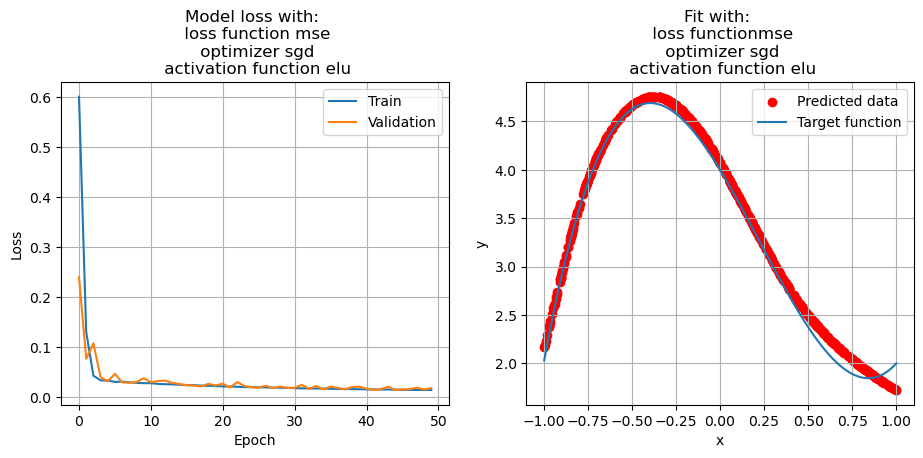

16/16 [==============================] - 0s 1ms/step


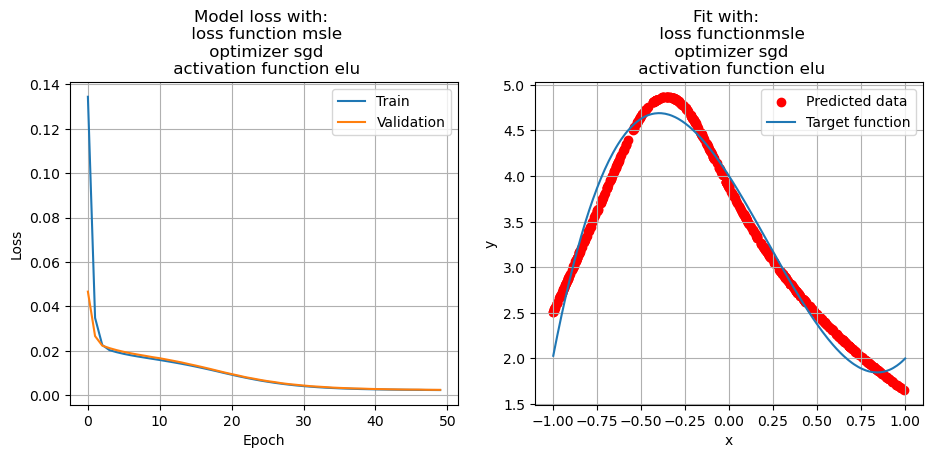

16/16 [==============================] - 0s 1ms/step


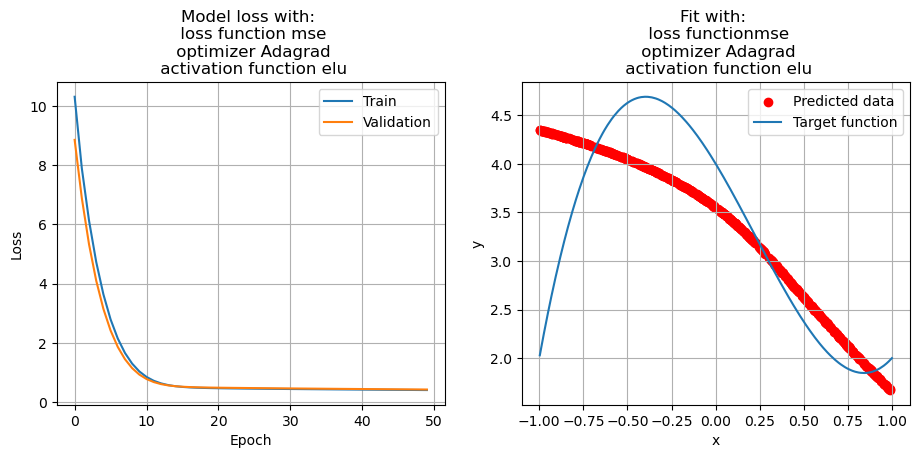

16/16 [==============================] - 0s 2ms/step


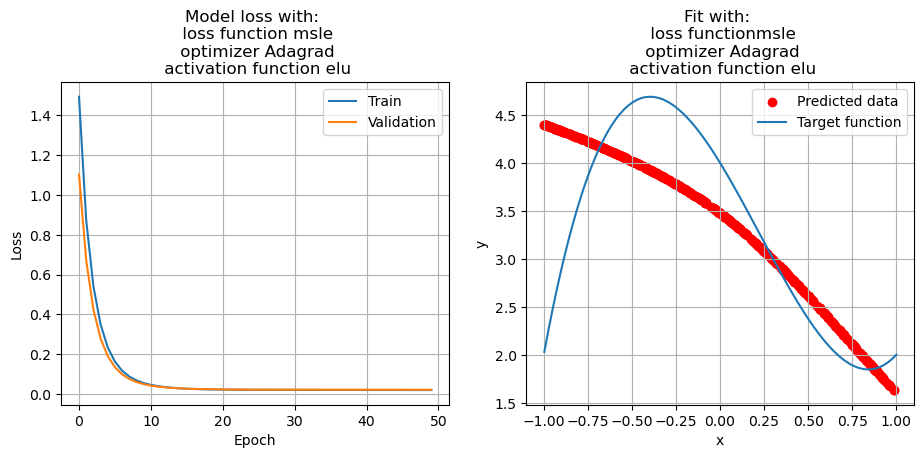

16/16 [==============================] - 0s 1ms/step


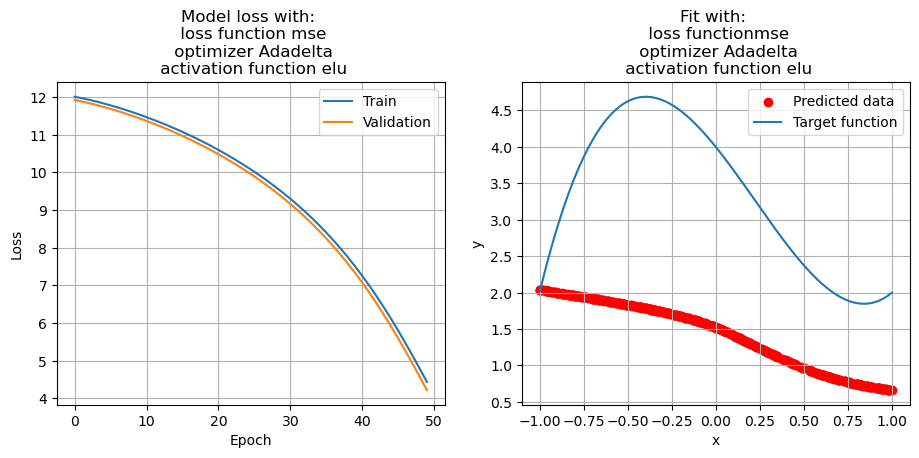

16/16 [==============================] - 0s 1ms/step


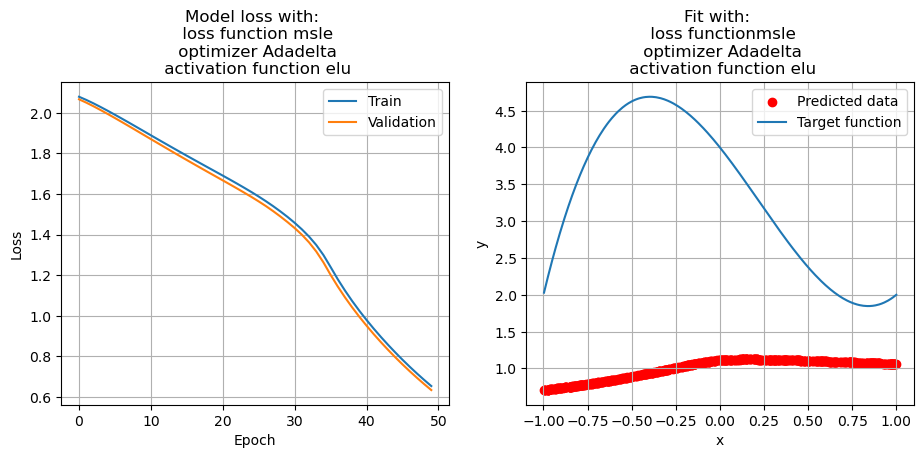

16/16 [==============================] - 0s 1ms/step


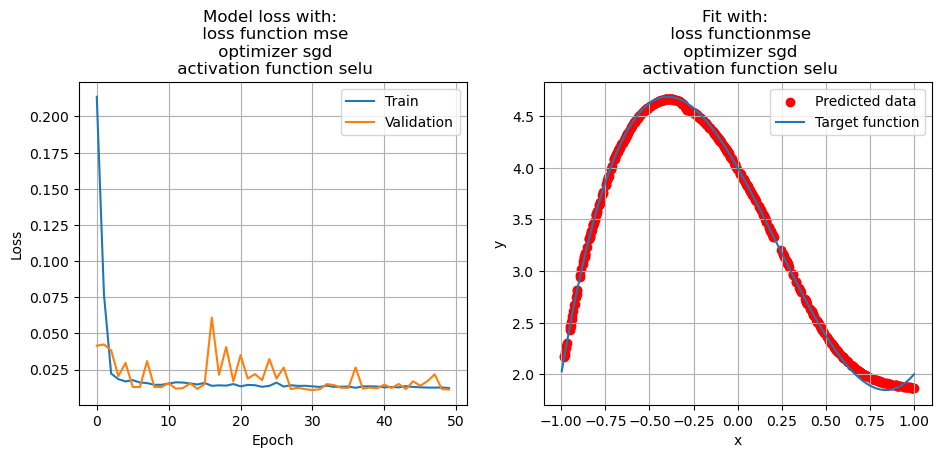

16/16 [==============================] - 0s 1ms/step


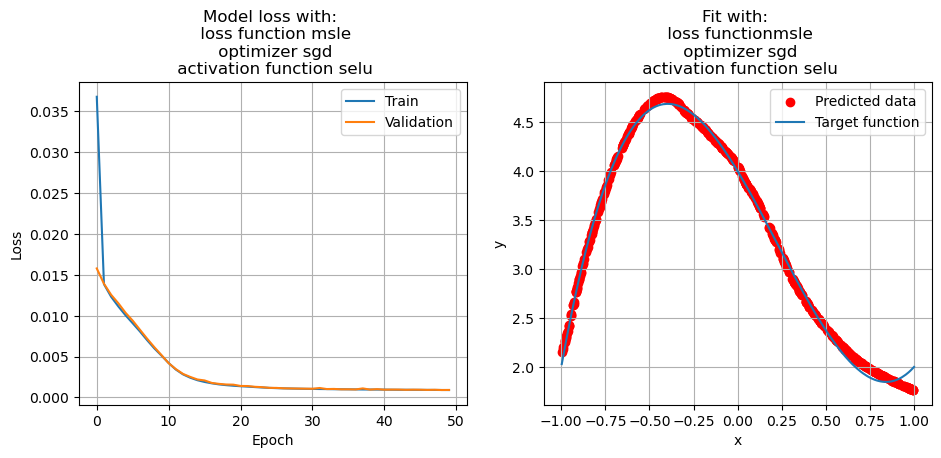

16/16 [==============================] - 0s 1ms/step


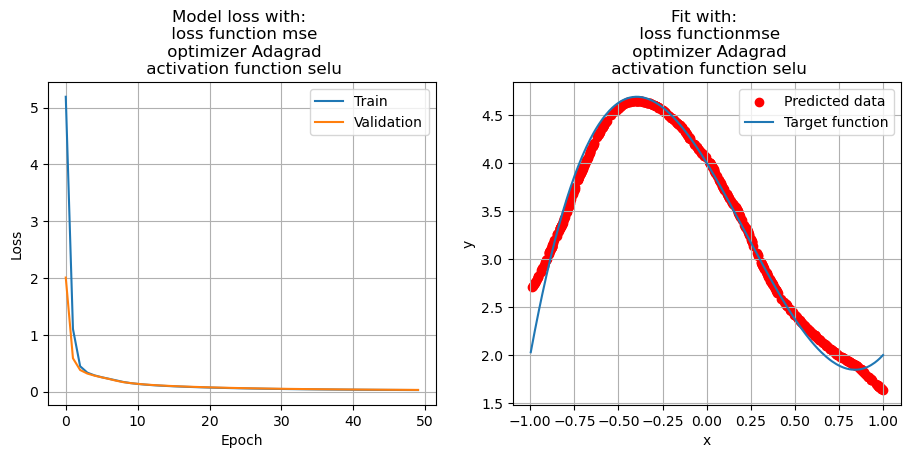

16/16 [==============================] - 0s 1ms/step


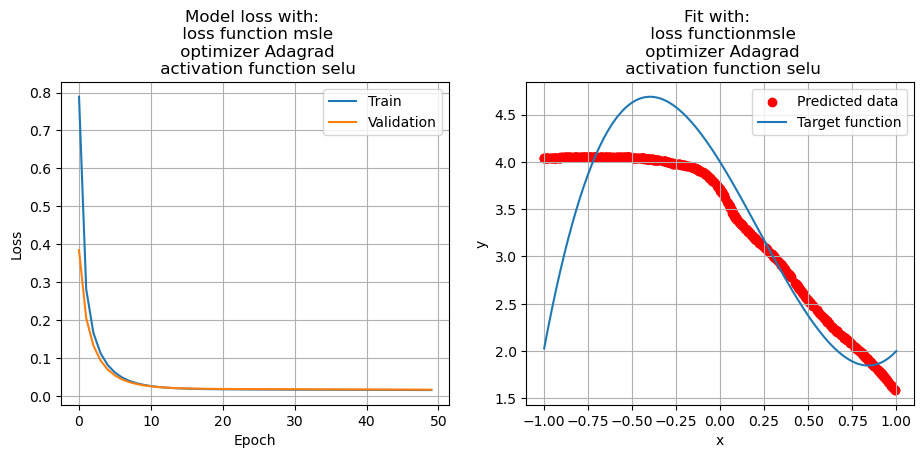

16/16 [==============================] - 0s 1ms/step


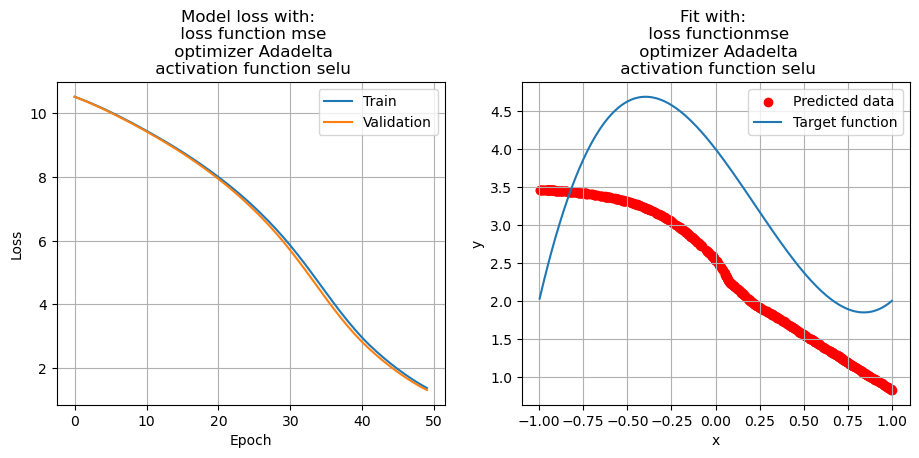

16/16 [==============================] - 0s 1ms/step


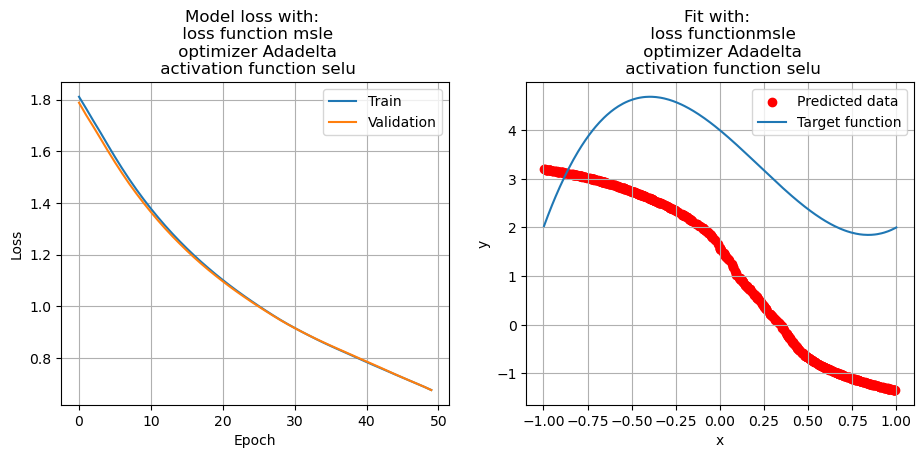

16/16 [==============================] - 0s 1ms/step


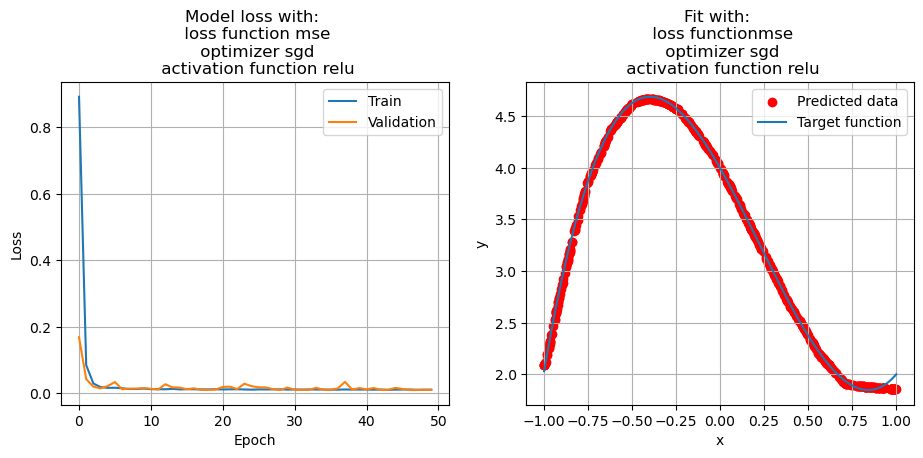

16/16 [==============================] - 0s 1ms/step


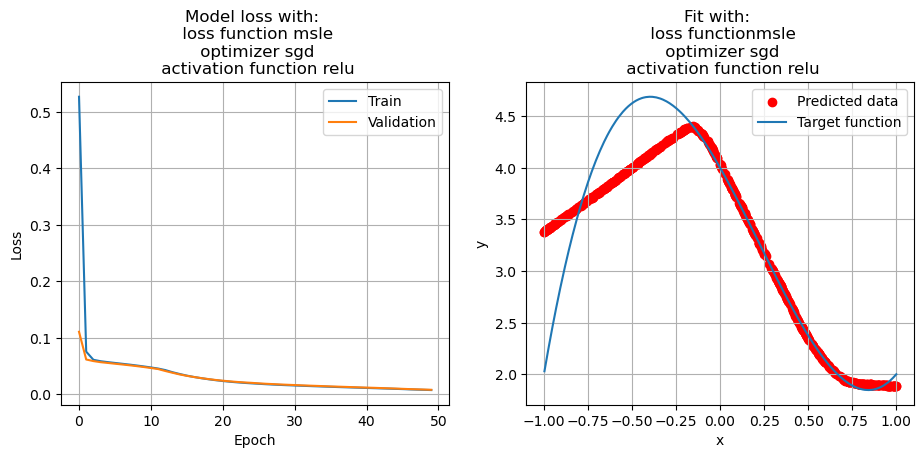

16/16 [==============================] - 0s 1ms/step


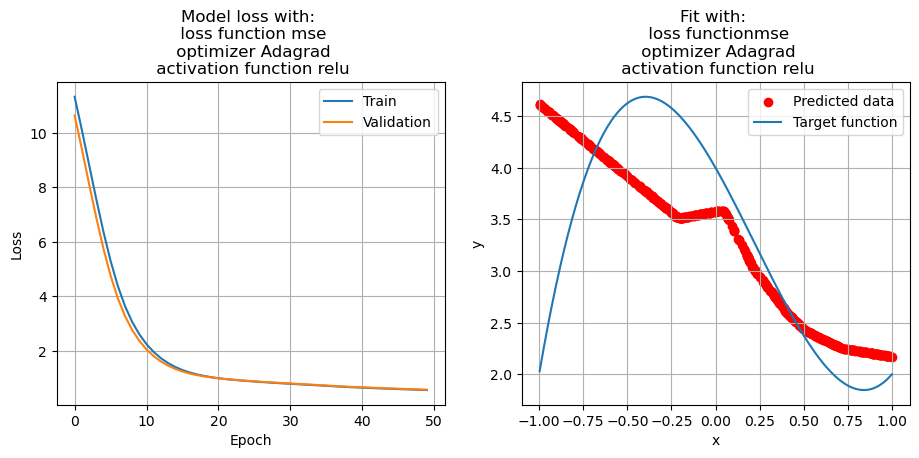

16/16 [==============================] - 0s 1ms/step


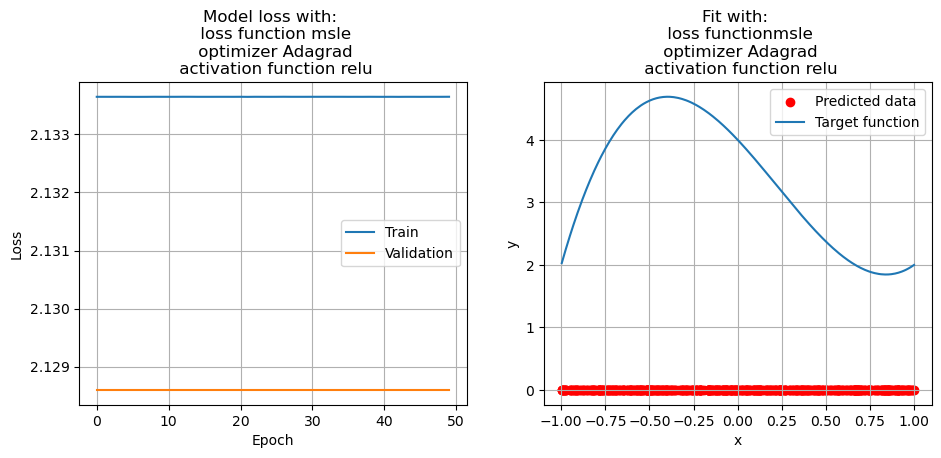

16/16 [==============================] - 0s 1ms/step


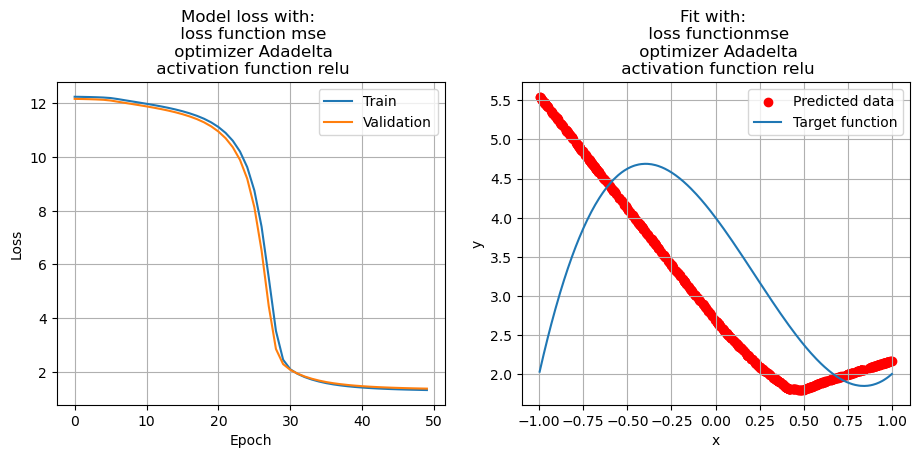

16/16 [==============================] - 0s 1ms/step


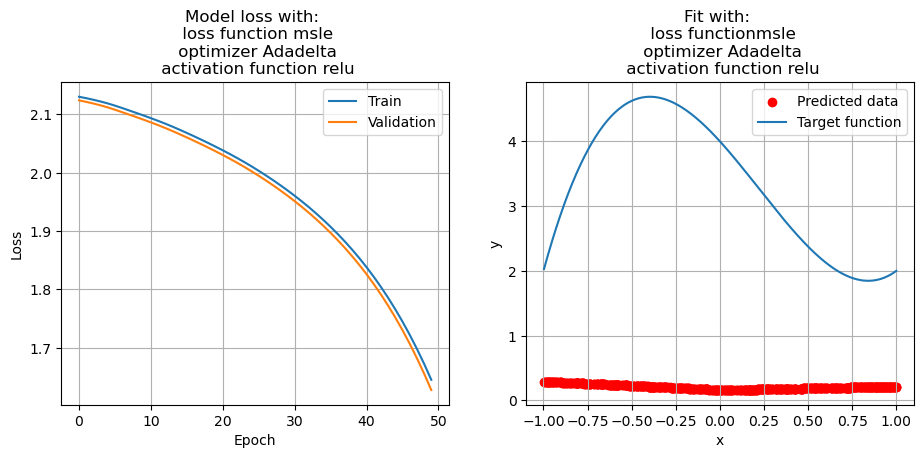

16/16 [==============================] - 0s 1ms/step


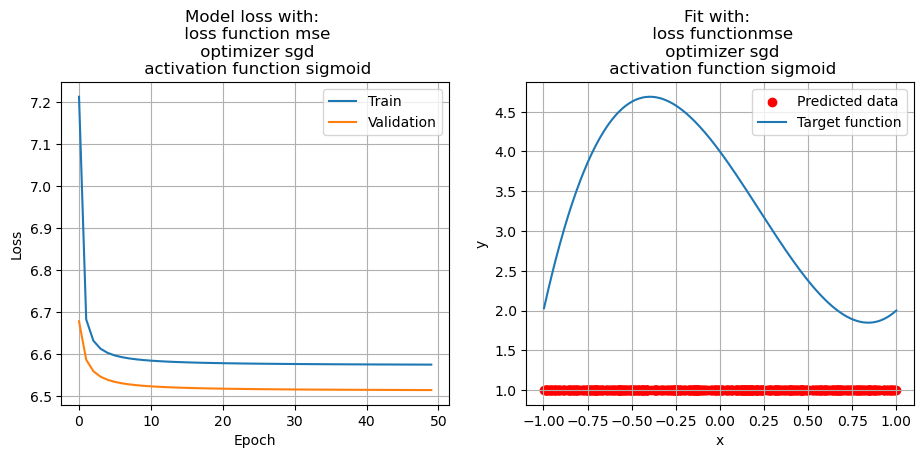

16/16 [==============================] - 0s 1ms/step


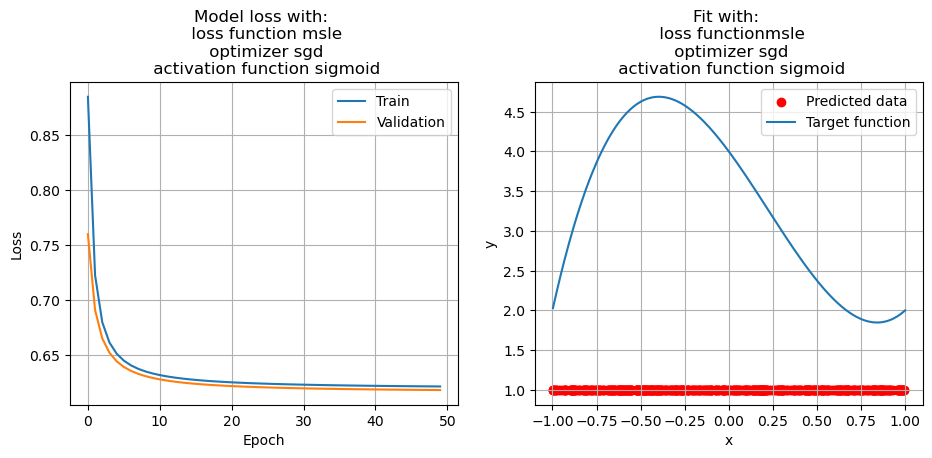

16/16 [==============================] - 0s 1ms/step


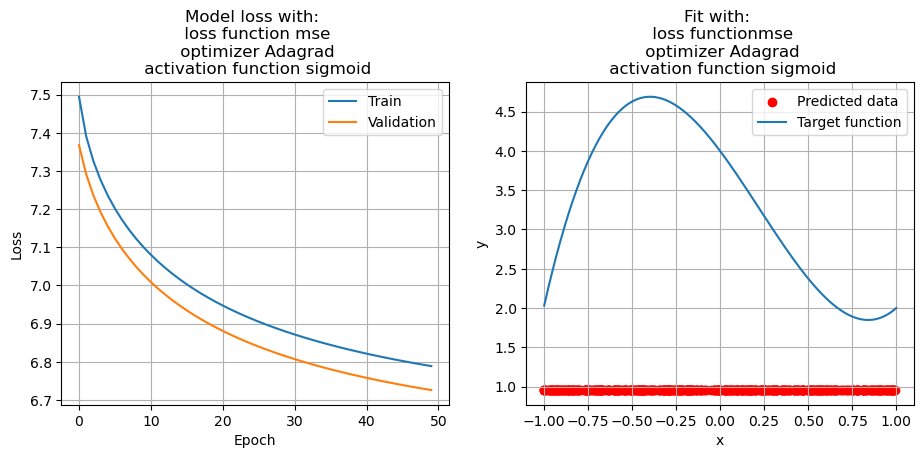

16/16 [==============================] - 0s 2ms/step


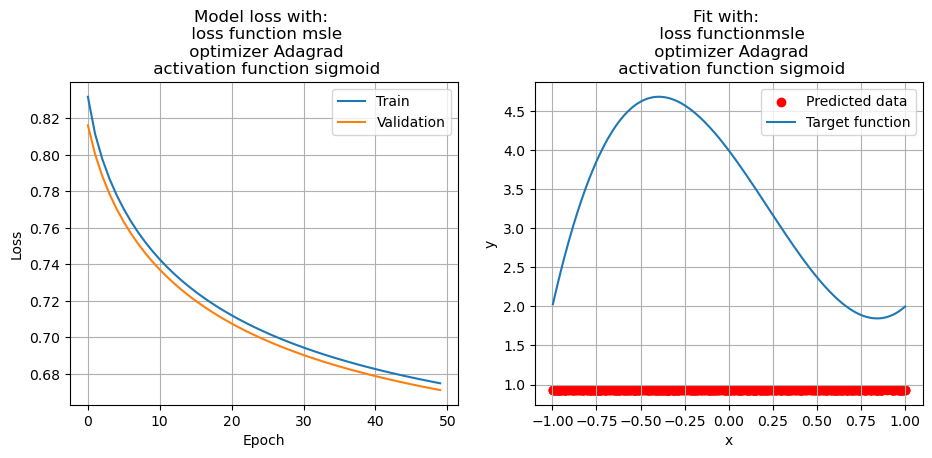

16/16 [==============================] - 0s 2ms/step


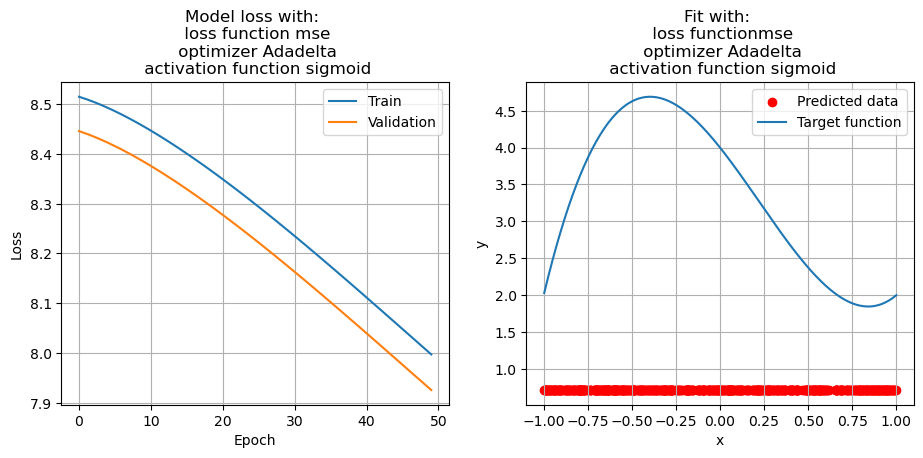

16/16 [==============================] - 0s 1ms/step


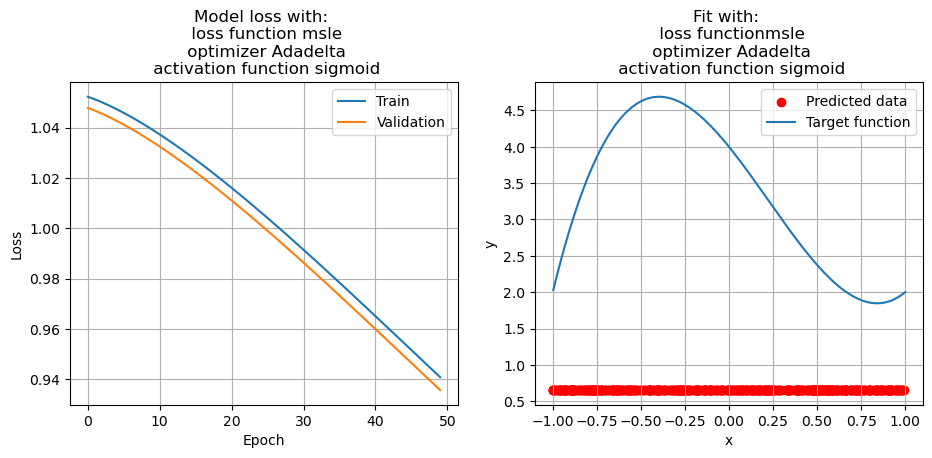

16/16 [==============================] - 0s 1ms/step


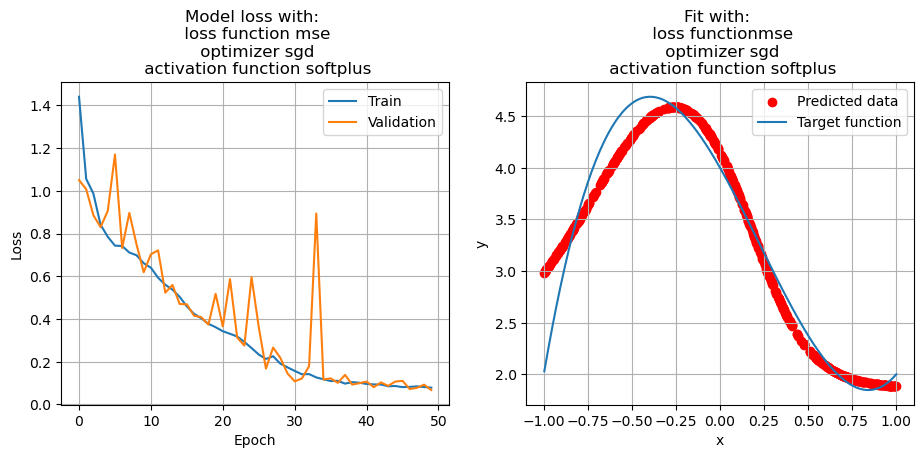

16/16 [==============================] - 0s 1ms/step


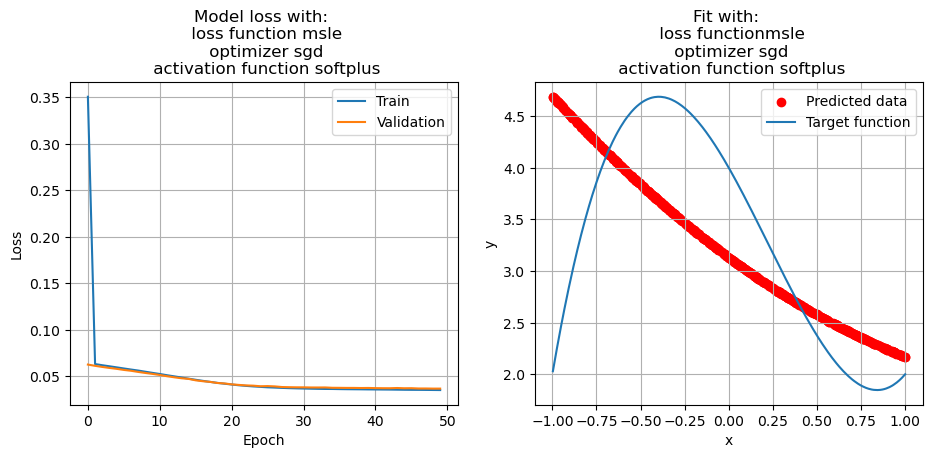

16/16 [==============================] - 0s 1ms/step


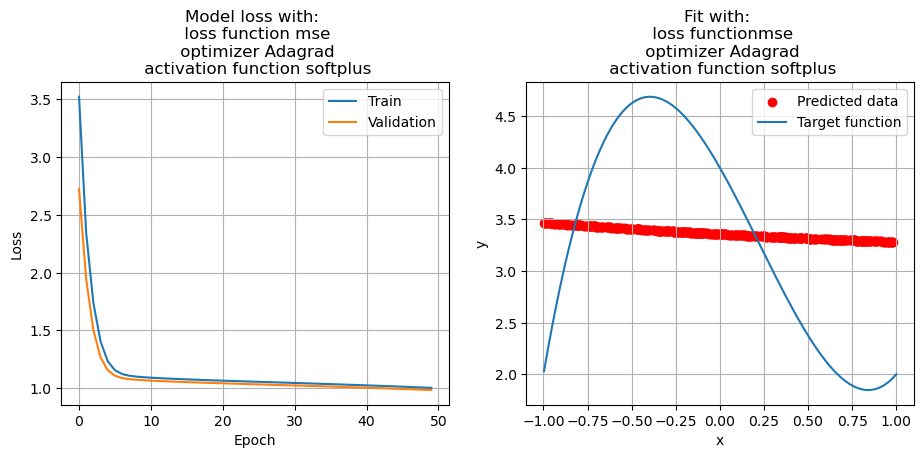

16/16 [==============================] - 0s 1ms/step


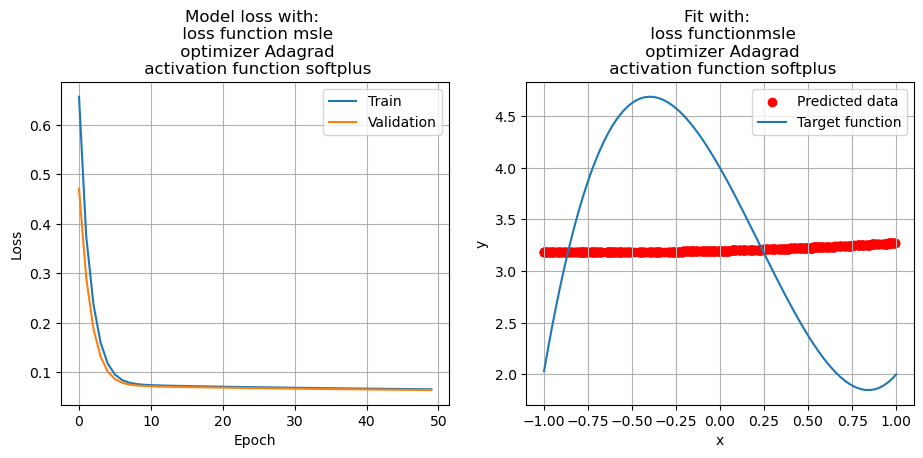

16/16 [==============================] - 0s 1ms/step


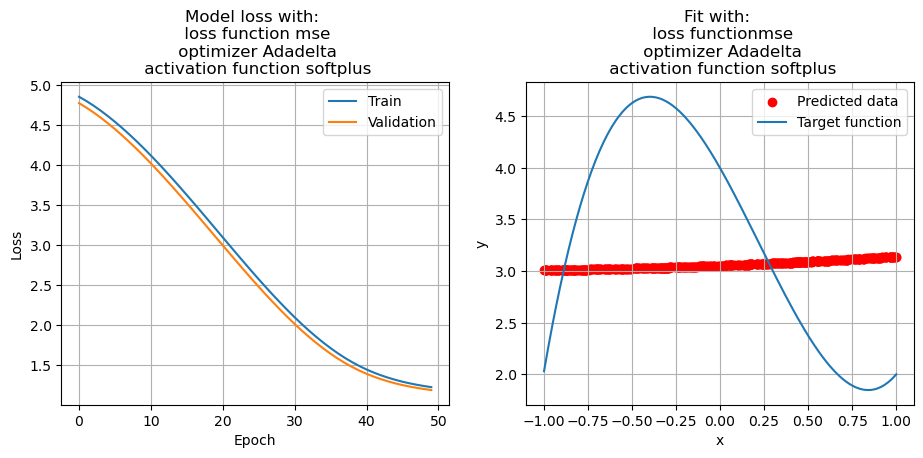

16/16 [==============================] - 0s 1ms/step


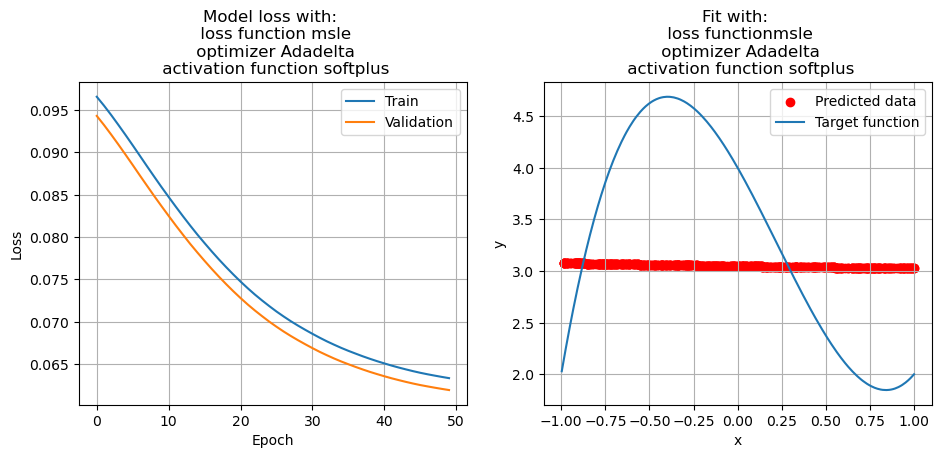

In [40]:
a = 4
b = -3
c = -2
d = 3

def g(x):
    return a + b*x + c*x*x + d*x*x*x

epochs_number = 50
sigma=0.1 #noise standard deviation
nr_neurons = 10
nr_layers = 5

activation_function = ['elu', 'selu', 'relu', 'sigmoid', 'softplus']
optimizer = ['sgd', 'Adagrad', 'Adadelta']
loss_function = ['mse', 'msle']
rows=len(activation_function)*len(optimizer)*len(loss_function)
columns=2
i=1

# generate training inputs
np.random.seed(0)
#90%train, 10%test
x_train = np.random.uniform(-1, 1, 5000) #dati di train
x_valid = np.random.uniform(-1, 1, 500) #set di valutazione
x_valid.sort()
y_target = g(x_valid)# ideal (target) linear function

#sporco i dati con un rumore gaussiano scorrelato
y_train = np.random.normal(g(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(g(x_valid), sigma)

for a in activation_function:
    for o in optimizer: 
        for l in loss_function:

            model = network_model(nr_neurons, nr_layers, o, l, a)
            history = fit_model(x_train,y_train, epochs_number, x_valid, y_valid)

            plt.figure(figsize=(11,5*rows))
            plt.subplot(rows, columns, i)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss with: \n loss function '+str(l)+'\n optimizer '+str(o)+'\n activation function '+ str(a))
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.grid(True)
            plt.legend(['Train', 'Validation'], loc='best')

            plt.subplot(rows, columns, i+1)           
            plt.title('Fit with: \n loss function ' +str(l)+'\n optimizer '+str(o)+'\n activation function '+ str(a))
            x_predicted = np.random.uniform(-1, 1, 500) 
            y_predicted = model.predict(x_predicted)
            plt.scatter(x_predicted, y_predicted,color='r', label ='Predicted data')
            plt.plot(x_valid, y_target, label ='Target function')
            plt.legend(loc='upper right')
            plt.ylabel('y')
            plt.xlabel('x')
            plt.grid(True)

            plt.show()

            i=i+2;

Osservando i plot possiamo affermare che le migliori combinazioni per il caso in esame siano il mean square errore come ufnzione costo, lo stochastic gradient decscent come ottimizzatore e l'elu, exponential linear unit, oppure la relu, rectified elu, come funzione di attivazione. Tra le due funzioni di attivazione, scegliamo di portare avanti il nostro studio con la relu dato che il network con essa riesce e predire leggermente meglio la "coda" finale.

Ora che abbiamo cercato di ottimizzare la nostra rete neurale sotto tutti i suoi aspetti, testiamo il suo potere predittivo sia per $x \in [-1,1]$, range in cui il network e' stato allenato attraverso i dati di training, sia per $x$ fuori da questo range.

22/22 [==============================] - 0s 1ms/step


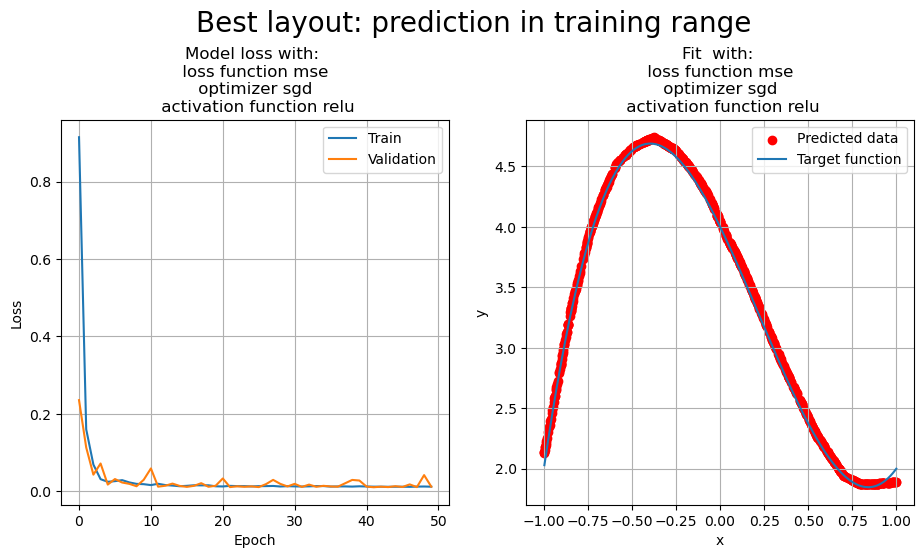

In [49]:
a = 4
b = -3
c = -2
d = 3

def g(x):
    return a + b*x + c*x*x + d*x*x*x

epochs_number = 50
sigma=0.1 #noise standard deviation
nr_neurons = 10
nr_layers = 5

rows=1
columns=2

# generate training inputs
np.random.seed(0)
#90%train, 10%test
x_train = np.random.uniform(-1, 1, 5000) #dati di train
x_valid = np.random.uniform(-1, 1, 500) #set di valutazione
x_valid.sort()
y_target = g(x_valid)# ideal (target) linear function

#sporco i dati con un rumore gaussiano scorrelato
y_train = np.random.normal(g(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(g(x_valid), sigma)

model = network_model(nr_neurons, nr_layers, 'sgd', 'mse', 'relu')
history = fit_model(x_train,y_train, epochs_number, x_valid, y_valid)

plt.figure(figsize=(11,5*rows))
plt.subplot(rows, columns, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss with: \n loss function mse \n optimizer sgd \n activation function relu')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Validation'], loc='best')

plt.subplot(rows, columns, 2)           
plt.title('Fit  with: \n loss function mse \n optimizer sgd \n activation function relu')
x_predicted = np.random.uniform(-1, 1, 700) 
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label ='Predicted data')
plt.plot(x_valid, y_target, label ='Target function')
plt.legend(loc='upper right')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.suptitle("Best layout: prediction in training range", fontsize=20, y=1.1)
plt.show()

10/10 [==============================] - 0s 1ms/step


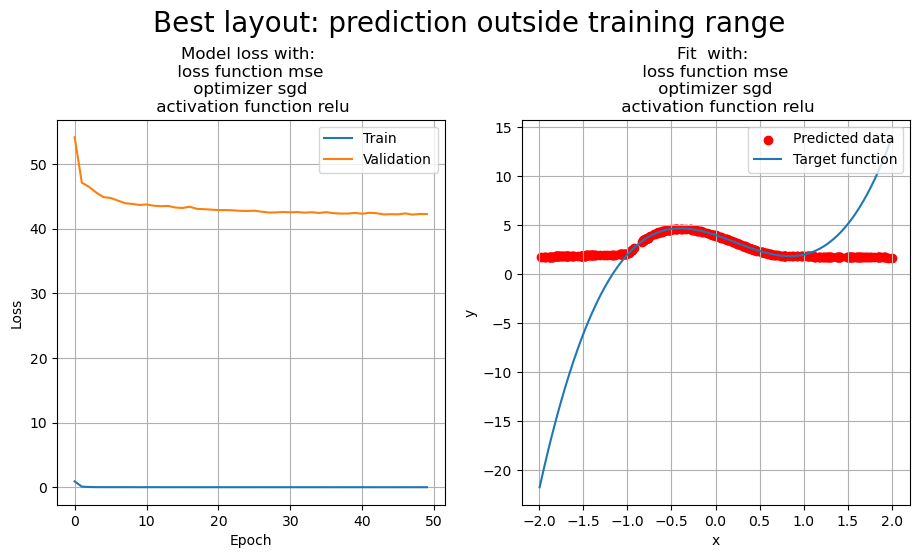

In [61]:
a = 4
b = -3
c = -2
d = 3

def g(x):
    return a + b*x + c*x*x + d*x*x*x

epochs_number = 50
sigma=0.1 #noise standard deviation
nr_neurons = 10
nr_layers = 5

rows=1
columns=2

# generate training inputs
np.random.seed(0)
#90%train, 10%test
x_train = np.random.uniform(-1, 1, 5000) #dati di train
x_valid = np.random.uniform(-2, 2, 500) #set di valutazione
x_valid.sort()
y_target = g(x_valid)# ideal (target) linear function

#sporco i dati con un rumore gaussiano scorrelato
y_train = np.random.normal(g(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(g(x_valid), sigma)

model = network_model(nr_neurons, nr_layers, 'sgd', 'mse', 'relu')
history = fit_model(x_train,y_train, epochs_number, x_valid, y_valid)

plt.figure(figsize=(11,5*rows))
plt.subplot(rows, columns, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss with: \n loss function mse \n optimizer sgd \n activation function relu')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Validation'], loc='best')

plt.subplot(rows, columns, 2)           
plt.title('Fit  with: \n loss function mse \n optimizer sgd \n activation function relu')
x_predicted = np.random.uniform(-2, 2, 300) 
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label ='Predicted data')
plt.plot(x_valid, y_target, label ='Target function')
plt.legend(loc='upper right')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.suptitle("Best layout: prediction outside training range", fontsize=20, y=1.1)
plt.show()

Possiamo osservare come fuori dal range in cui abbiamo allenato la rete neurale, essa non riesce a predire e, quindi, fittare il polinomio e la loss nel caso del set di test non riesce a scendere a valori minori di 40.

Notiamo, quindi, come per effttuare una buona predizione la rete neurale deve essere allenata in tutto il range di interesse e non e' capace di estrapolare l'andamento atteso in intervalli che non ha mai studiato prima.